In [2]:
import cv2                  #working with, mainly resizing, images
import numpy as np          #dealing with arrays
import os#dealing with directories
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
from random import shuffle  #mixing up the ordered data to help our network be more accurate 
from tqdm import tqdm       #a percentage bar
import matplotlib.pyplot as plt

IMG_SIZE = 50
LR = 1e-3

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '6conv-basic-video')

In [3]:
def label_img(img):
    word_label = img.split('.')[-3]
    #coversion to one-hot array [cat,dog]
    #                           [much kitteh, no pupper]
    if word_label == 'cat':return [1,0]
    #                           [no kitkat, much doggo]
    elif word_label == 'dog': return [0,1]

In [4]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir('C:\\Users\iD Student\Desktop\Lucie W\CatsAndDogs/train')):
        label = label_img(img)
        path = os.path.join('C:\\Users\iD Student\Desktop\Lucie W\CatsAndDogs/train',img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data         

In [5]:
#shuffles and processes the dataset
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir('C:\\Users\iD Student\Desktop\Lucie W\CatsAndDogs/test')):
        path = os.path.join('C:\\Users\iD Student\Desktop\Lucie W\CatsAndDogs/test',img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE), (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    np.save('test_data.npy', testing_data)
    return testing_data

In [6]:
#shuffles and processes the custom dataset
def process_custom_data():
    custom_data = []
    for img in tqdm(os.listdir('C:\\Users\iD Student\Desktop/CatDog')):
        path = os.path.join('C:\\Users\iD Student\Desktop/CatDog',img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE), (IMG_SIZE,IMG_SIZE))
        custom_data.append([np.array(img), img_num])
        
    np.save('custom_data.npy', custom_data)
    return custom_data

In [7]:
train_data = create_train_data()

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:51<00:00, 481.80it/s]


In [8]:
#defines the neural net
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression


import tensorflow as tf
tf.reset_default_graph

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

#model = tflearn.DNN(convnet, tensorboard_dir='log')
model = tflearn.DNN(convnet)

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


In [9]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    #model.load(MODEL_NAME)
    print('your old progress thingy has loaded :)')
else:
    print("uh oh yall be restarting ) g:")

your old progress thingy has loaded :)


In [10]:
train = train_data[:-500]
test = train_data[-500:]

In [11]:
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = [i[1] for i in train]

print("X size: ",len(X))
print("Y size: ",len(Y))


test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]


print("shape of test_x:",test_x.shape)
print("shape of test_y:",len(test_y))

X size:  24500
Y size:  24500
shape of test_x: (500, 50, 50, 1)
shape of test_y: 500


In [28]:
model.fit({'input': X}, {'targets': Y}, n_epoch=1, validation_set=({'input': test_x}, {'targets': test_y}),
    snapshot_step=500, show_metric=True)

Training Step: 6893  | total loss: 0.11452 | time: 99.036s
| Adam | epoch: 018 | loss: 0.11452 - acc: 0.9645 -- iter: 24448/24500
Training Step: 6894  | total loss: 0.11007 | time: 100.239s
| Adam | epoch: 018 | loss: 0.11007 - acc: 0.9649 | val_loss: 0.68527 - val_acc: 0.8140 -- iter: 24500/24500
--


100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:14<00:00, 882.35it/s]


our neural network output: [ 0.49615648  0.50384355]
our neural network output: [ 0.9907679   0.00923207]
our neural network output: [ 0.37781492  0.62218511]
our neural network output: [ 0.02236609  0.97763389]
our neural network output: [ 0.00942766  0.99057227]
our neural network output: [ 0.98488128  0.01511874]
our neural network output: [ 0.90522218  0.09477778]
our neural network output: [ 0.0922028   0.90779722]
our neural network output: [ 0.05019803  0.94980192]
our neural network output: [ 0.86453897  0.13546097]
our neural network output: [ 0.96700388  0.03299606]
our neural network output: [ 0.99509227  0.00490769]


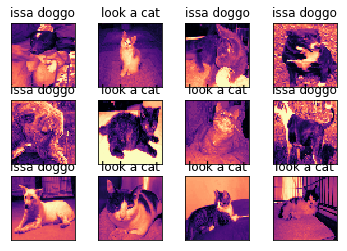

In [18]:
test_data = process_test_data()

fig=plt.figure()

for num, data in enumerate(test_data[:12]):
    #lkh;   cat: [1,0]
    #doggo: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    
    model_out = model.predict([data])[0]
    print("our neural network output:",model_out)
    if np.argmax(model_out) >= 1: str_label = 'doggo'
    else: str_label = 'kitteh'
        
    y.imshow(orig, cmap='magma')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 535.71it/s]


our neural network output: [ 0.02107004  0.97893   ]
our neural network output: [ 0.06086816  0.9391318 ]
our neural network output: [  3.84116502e-05   9.99961615e-01]
our neural network output: [  9.99579251e-01   4.20723343e-04]
our neural network output: [ 0.8544215  0.1455785]
our neural network output: [ 0.01892817  0.98107189]
our neural network output: [ 0.98061758  0.01938245]
our neural network output: [ 0.04194812  0.95805186]


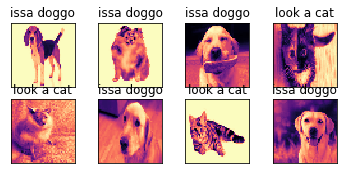

In [15]:
my_data = process_custom_data()

fig=plt.figure()

for num, data in enumerate(my_data[:100]):
    #lkh;   cat: [1,0]
    #doggo: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    
    model_out = model.predict([data])[0]
    print("our neural network output:",model_out)

    if np.argmax(model_out) == 1: str_label = 'pupper'
    else: str_label = 'CATTTT'
        
    y.imshow(orig, cmap = 'magma')
    #plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

plt.show()